In [2]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7562014615644812051
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10078912512
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16061347701883039587
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:0a:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [ ]:
import h5py

print(h5py.__version__)

In [3]:
import tensorflow as t
t.__version__

'2.7.0'

In [42]:
!pip install kaggle

In [43]:
!kaggle datasets download -d lexset/synthetic-asl-alphabet


  0%|          | 0.00/6.58G [00:00<?, ?B/s]
  0%|          | 5.00M/6.58G [00:00<08:12, 14.3MB/s]
  0%|          | 9.00M/6.58G [00:00<05:36, 20.9MB/s]
  0%|          | 15.0M/6.58G [00:00<03:37, 32.4MB/s]
  0%|          | 20.0M/6.58G [00:01<07:11, 16.3MB/s]
  0%|          | 26.0M/6.58G [00:01<05:04, 23.1MB/s]
  0%|          | 32.0M/6.58G [00:01<03:54, 30.0MB/s]
  1%|          | 37.0M/6.58G [00:01<05:01, 23.3MB/s]
  1%|          | 43.0M/6.58G [00:01<03:57, 29.6MB/s]
  1%|          | 49.0M/6.58G [00:02<06:52, 17.0MB/s]
  1%|          | 55.0M/6.58G [00:02<05:16, 22.2MB/s]
  1%|          | 61.0M/6.58G [00:02<04:12, 27.7MB/s]
  1%|          | 67.0M/6.58G [00:02<03:29, 33.4MB/s]
  1%|1         | 73.0M/6.58G [00:02<02:59, 39.0MB/s]
  1%|1         | 79.0M/6.58G [00:03<02:38, 44.0MB/s]
  1%|1         | 85.0M/6.58G [00:04<07:47, 14.9MB/s]
  1%|1         | 91.0M/6.58G [00:04<05:59, 19.4MB/s]
  1%|1         | 97.0M/6.58G [00:04<04:44, 24.5MB/s]
  2%|1         | 103M/6.58G [00:04<03:52, 29.9MB/s] 
 

In [46]:
%mkdir data2

In [47]:
import shutil
filename="synthetic-asl-alphabet.zip"
extract_dir="./data2"
archive_format="zip"
shutil.unpack_archive(filename,extract_dir,archive_format)

In [4]:
import os

root_dir="./data2"

for dir in sorted(next(os.walk(root_dir))[1]):
    print(dir)
    subdir_1=os.path.join(root_dir,dir)
    for subdir1 in sorted(next(os.walk(subdir_1))[1]):
        print("      |---",subdir1)
        subdir_2=os.path.join(subdir_1,subdir1)
        for ind,subdir3 in enumerate(sorted(next(os.walk(subdir_2))[2])):
            if ind==3:
                break
            print("            |-----",subdir3)

Test_Alphabet
      |--- A
            |----- 081a8b28-7394-4254-95aa-e40f7c8989c8.rgb_0000.png
            |----- 09a13b4f-b68f-43fd-86e3-5644224490a2.rgb_0000.png
            |----- 09ea96a0-eb7b-4ce5-8a50-b33f345bc9ef.rgb_0000.png
      |--- B
            |----- 00e69efb-c8df-40a8-b951-4e167dc4fc5a.rgb_0000.png
            |----- 03314a4b-3f99-4159-8631-512b56bd7b90.rgb_0000.png
            |----- 0a408bd0-b67c-42c1-974a-cb700713f18a.rgb_0000.png
      |--- Blank
            |----- 002fc271-e07b-432e-a8a8-9087815803cf.rgb_0000.png
            |----- 0428dada-bb7a-4320-af69-a0722893a332.rgb_0000.png
            |----- 060e2ba6-04c7-4fd9-b14f-13aefaffb836.rgb_0000.png
      |--- C
            |----- 02409944-2e03-4882-83c9-238732fe18d2.rgb_0000.png
            |----- 02463aa0-3d03-49da-879b-0dd5665b0c7e.rgb_0000.png
            |----- 04b52b89-b7fc-4d6c-bc9f-ac2c6615ba94.rgb_0000.png
      |--- D
            |----- 0229ddc3-760f-4f42-9972-5d3993124113.rgb_0000.png
            |----- 0

In [9]:
label_dict={}
for ind, i in enumerate(range(65,92)):
    if ind==2:
        label_dict[ind]="Blank"
    elif ind<2:
        label_dict[ind]=chr(i)
    else:
        label_dict[ind]=chr(i-1)
label_dict

{0: 'A',
 1: 'B',
 2: 'Blank',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z'}

In [10]:
import pandas as pd
import os

labels_t={v:k for k,v in label_dict.items()}

paths=[]
labels=[]
label_gt=[]

# dirname = ./data2/Train_Alphabet/A
# filenames  = 0042513a-63c0-499f-a7f7-e6ee1266cb98.rgb_0000.png
def make_DF(root_dir):
    
    paths=[]
    labels=[]
    label_gt=[]
    
    for dirname,_,filenames in os.walk(root_dir):
        for filename in filenames:
            if ".png" in filename:
                filepath=os.path.join(dirname,filename)
                filepath=filepath.replace("\\","/")
                paths.append(filepath)
                dirname=dirname.replace("\\","/")
                label_name=dirname[dirname.rfind("/")+1:]
                labels.append(label_name)

                label_gt.append(labels_t[label_name])
                pd.set_option("max_colwidth",100)            

    data_df=pd.DataFrame({"path":paths,"label":labels,"label_gt":label_gt})
    return data_df
    
train_df=make_DF("./data2/Train_Alphabet")
test_df=make_DF("./data2/Test_Alphabet")

train_df.shape,test_df.shape

((24300, 3), (2700, 3))

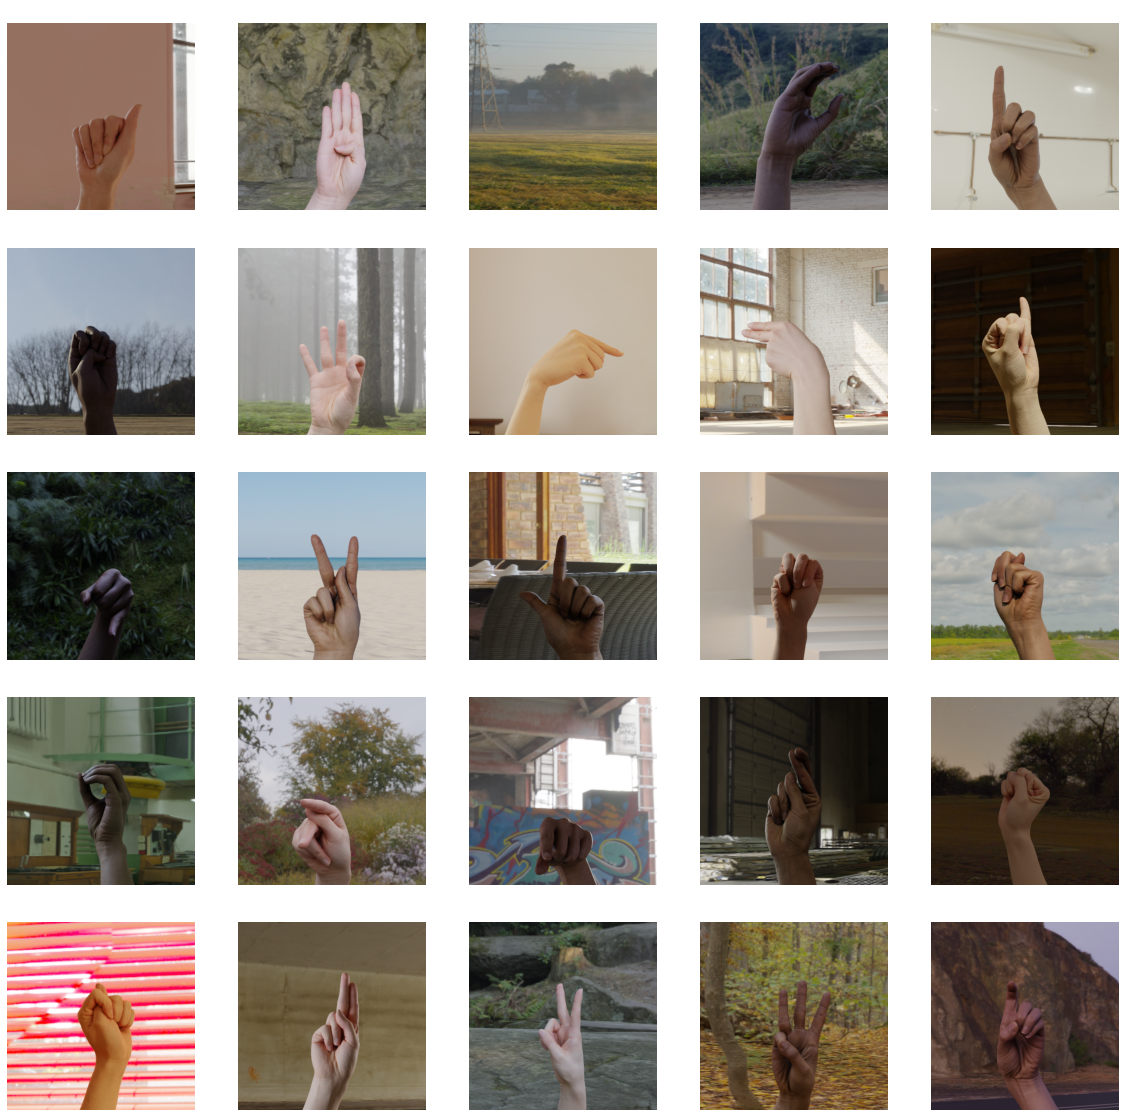

In [11]:
import cv2
import matplotlib.pyplot as plt

def show_image(df,augmentor):
    plt.figure(figsize=(20,20))
    for i in range(25):
        plt.subplot(5,5,i+1)
        imgpath=df["path"][900*i]
        img=cv2.cvtColor(cv2.imread(imgpath),cv2.COLOR_BGR2RGB)
        if augmentor is not None:
            img=augmentor(image=img)["image"]
        plt.title(label_dict[i], color='white', fontsize=12)
        plt.axis("off")
        plt.imshow(img)

show_image(train_df,None)

In [21]:
from sklearn.model_selection import train_test_split

train_path=train_df["path"].values
train_label=pd.get_dummies(train_df["label"]).values

test_path=test_df["path"].values
test_label=pd.get_dummies(test_df["label"]).values

tr_path,val_path,tr_label,val_label=train_test_split(train_path,train_label,stratify=train_df["label"],
                                                    test_size=0.35,random_state=2022)

print("tr_path shape : ",tr_path.shape, "tr_label shape : ",tr_label.shape,"\n"
      "val_path shape : ",val_path.shape,"val_label shape : ",val_label.shape,"\n"
      "test_path shape : ",test_path.shape,"test_label shape : ",test_label.shape)

tr_path shape :  (15795,) tr_label shape :  (15795, 27) 
val_path shape :  (8505,) val_label shape :  (8505, 27) 
test_path shape :  (2700,) test_label shape :  (2700, 27)


In [22]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Flatten,Activation,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import  ResNet50V2, MobileNet,VGG16,InceptionV3

def create_model(model_name,n_classes,is_print=True):
    input_tensor=Input(shape=(224,224,3))
    if model_name=="resnet":
        cnn_model=ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_name=="vgg":
        cnn_model=VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_name=="inception":
        cnn_model=InceptionV3(include_top=False, weights='imagenet', input_tensor=input_tensor)

    
    output_layer=cnn_model.output
    
    x=GlobalAveragePooling2D()(output_layer)
    x = Dense(1024, activation='relu')(x)
    x=Dropout(0.2)(x)
        
    output=Dense(n_classes,activation="softmax")(x)
    
    model=Model(inputs=input_tensor,outputs=output)
       
    if is_print:
        model.summary()
    
    return model

In [23]:
vgg_model=create_model("vgg",27,is_print=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
resnet_model=create_model("resnet",27,is_print=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [25]:
incpetion_model=create_model("inception",27,is_print=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [26]:
from tensorflow.keras.utils import Sequence
import numpy as np
import cv2

BATCH_SIZE=64
IMG_SIZE=224

class ASLDataset(Sequence):
    def __init__(self,img_filename,labels,batch_size=BATCH_SIZE,img_size=IMG_SIZE
                 ,shuffle=False,augmentor=None,pre_func=None):
        self.img_filename=img_filename
        self.labels=labels
        self.batch_size=batch_size
        self.img_size=img_size
        self.shuffle=shuffle
        self.augmentor=augmentor
        self.pre_func=pre_func
        
    def __len__(self):
        return int(np.ceil(len(self.img_filename)/self.batch_size))
    
    def __getitem__(self,index):
        get_img_filename_batch=self.img_filename[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            get_labels_batch=self.labels[index*self.batch_size:(index+1)*self.batch_size]
            
        resize_img_batch_board=np.zeros((get_img_filename_batch.shape[0],self.img_size,self.img_size,3))
        for img_index in range(get_img_filename_batch.shape[0]):
            img=cv2.cvtColor(cv2.imread(get_img_filename_batch[img_index]),cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                img=self.augmentor(image=img)["image"]
            img=cv2.resize(img,(self.img_size,self.img_size))
            #img=img[:,:, np.newaxis]
            #print(img.shape)
            if self.pre_func is not None:
                img=self.pre_func(img)
            
            resize_img_batch_board[img_index]=img
            
        return resize_img_batch_board,get_labels_batch

In [31]:
import albumentations as A
augmentor = A.Compose([
    A.Blur(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ShiftScaleRotate(p=0.5),
    A.OneOf([
        A.CenterCrop(height=90, width=90, p=0.2),
        ], p=0.3)
])

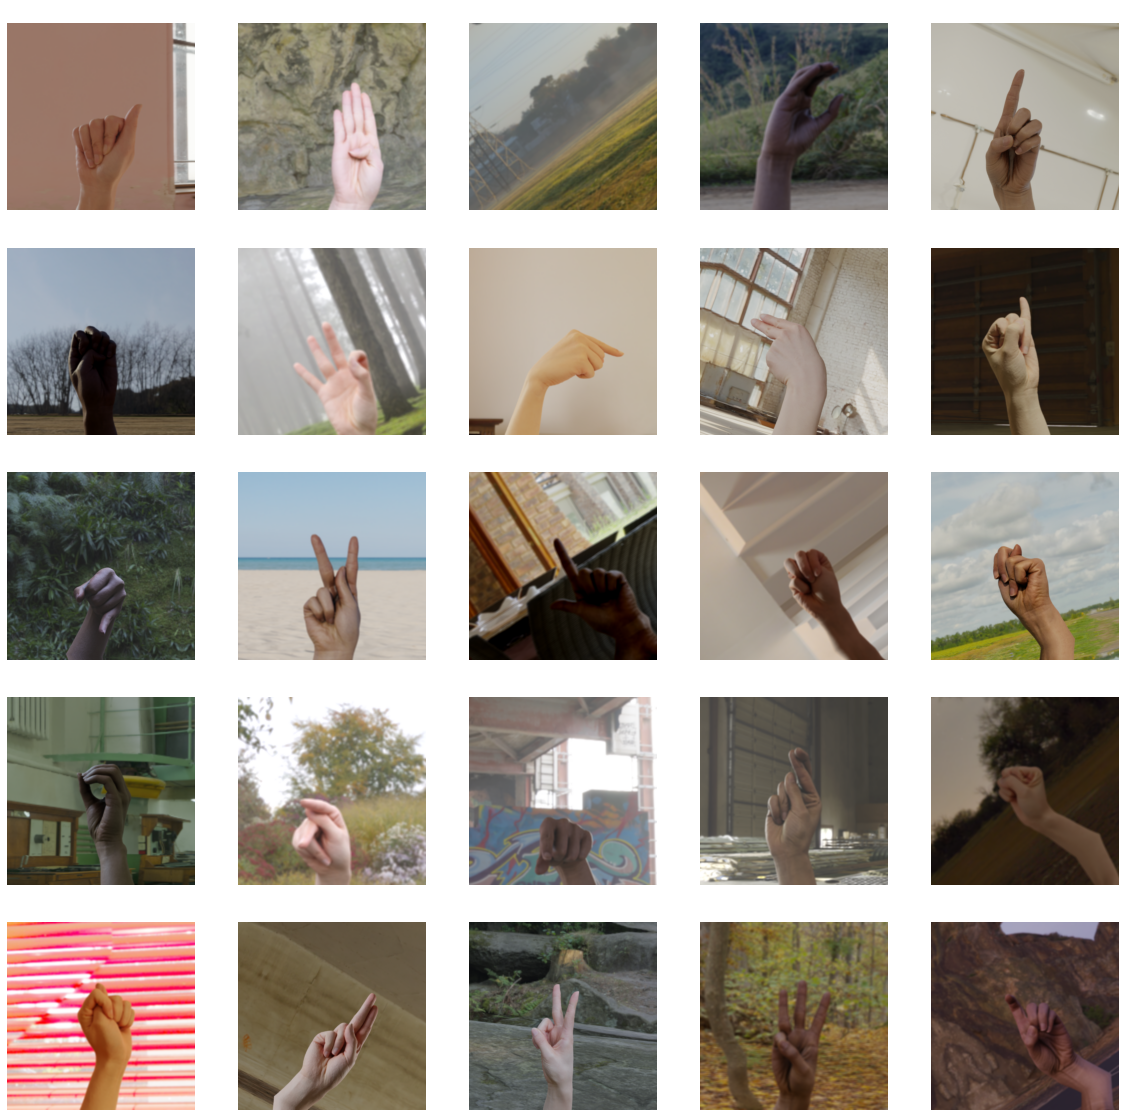

In [32]:
show_image(train_df,augmentor)

In [35]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
import time

def train_model(model_name,is_print=False):

    if model_name=="resnet":
        pre_func=resnet_preprocess_input
    elif model_name=="vgg":
        pre_func=vgg_preprocess_input
    elif model_name=="inception":
        pre_func=inception_preprocess_input

    tr_ds=ASLDataset(tr_path,tr_label,batch_size=BATCH_SIZE,img_size=IMG_SIZE,
                 shuffle=True,augmentor=augmentor,pre_func=pre_func)
    val_ds=ASLDataset(val_path,val_label,batch_size=BATCH_SIZE,img_size=IMG_SIZE,
                  shuffle=False,augmentor=None,pre_func=pre_func)
    test_ds=ASLDataset(test_path,test_label,batch_size=BATCH_SIZE,img_size=IMG_SIZE,
              shuffle=False,augmentor=None,pre_func=pre_func)

    tr_img_array=next(iter(tr_ds))[0]
    tr_labe_array=next(iter(tr_ds))[1]
    
    val_img_array=next(iter(val_ds))[0]
    val_labe_array=next(iter(val_ds))[1]

    test_img_array=next(iter(test_ds))[0]
    test_labe_array=next(iter(test_ds))[1]
    
    if is_print:
        print(tr_img_array.shape,tr_labe_array.shape)
        print(val_img_array.shape,val_labe_array.shape)
        print(test_img_array.shape,test_labe_array.shape)
    
    model=create_model(model_name,27,is_print=False)

    model.compile(optimizer=Adam(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
    
    for layer in model.layers[:-3]:
        layer.trainable=False
    
    FIRST_EPOCHS = 5
    SECOND_EPOCHS = 5
    
    rly_cb=ReduceLROnPlateau(factor=0.2,monitor="val_loss",mode="min",patience=3,verbose=1)
    ely_cb=EarlyStopping(monitor="val_loss",mode="min",patience=5,verbose=1)
    
    history = model.fit(tr_ds, epochs=FIRST_EPOCHS,validation_data=val_ds,verbose=1,callbacks=[ely_cb,rly_cb])

    for layer in model.layers:
        if not not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
            
    model.compile(optimizer=Adam(0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
    
    start_time=time.time()
    history = model.fit(tr_ds, epochs=SECOND_EPOCHS,validation_data=val_ds,verbose=1,callbacks=[ely_cb,rly_cb])
    train_time=time.time()-start_time
    
    return model, history, test_ds,train_time

In [36]:
print("## VGG16") 
vgg_model, vgg_history, vgg_test_ds,vgg_training_time=train_model("vgg")
print(vgg_training_time)
vgg_model.save("vgg_model.h5")    

## VGG16
Epoch 1/5
247/247 [==============================] - 321s 1s/step - loss: 3.5368 - accuracy: 0.0320 - val_loss: 3.2959 - val_accuracy: 0.0372 - lr: 0.0010
Epoch 2/5
247/247 [==============================] - 165s 667ms/step - loss: 3.2965 - accuracy: 0.0341 - val_loss: 3.2959 - val_accuracy: 0.0370 - lr: 0.0010
Epoch 3/5
247/247 [==============================] - 166s 671ms/step - loss: 3.2963 - accuracy: 0.0341 - val_loss: 3.2959 - val_accuracy: 0.0370 - lr: 0.0010
Epoch 4/5
247/247 [==============================] - ETA: 0s - loss: 3.2962 - accuracy: 0.0348
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
247/247 [==============================] - 166s 671ms/step - loss: 3.2962 - accuracy: 0.0348 - val_loss: 3.2958 - val_accuracy: 0.0370 - lr: 0.0010
Epoch 5/5
 62/247 [======>.......................] - ETA: 1:23 - loss: 3.2959 - accuracy: 0.0388

KeyboardInterrupt: 

In [ ]:
print("## ResNet50V2")
resnet_model, resnet_history, resnet_training_time, resnet_test_ds=train_model("resnet")
resnet_model.save("resnet_model.h5")

In [ ]:
print("## InceptionV3")
inception_model, inception_history, inception_training_time, inception_test_ds=train_model("inception")
inception_model.save("inception_model.h5")

In [ ]:
pred=model.predict(test_ds)

In [382]:
pred

array([[9.9980479e-01, 3.7584242e-09, 8.3968112e-09, ..., 2.1310802e-08,
        5.1209963e-07, 1.3571255e-09],
       [9.7837776e-01, 1.6413712e-07, 7.7270205e-13, ..., 2.6400190e-07,
        8.9780858e-04, 9.6511081e-05],
       [9.8502398e-01, 2.3557375e-10, 7.1497343e-11, ..., 2.1994649e-06,
        4.1478727e-04, 5.9097175e-07],
       ...,
       [1.4585049e-08, 4.6225272e-05, 4.1228546e-10, ..., 2.5462991e-06,
        3.5627989e-05, 9.9878508e-01],
       [2.4333867e-11, 9.1727807e-06, 7.9023932e-14, ..., 2.0715285e-07,
        8.6359472e-07, 9.9183172e-01],
       [3.6078720e-05, 6.5193516e-03, 5.1135401e-05, ..., 1.1630065e-03,
        1.5332827e-01, 4.3288851e-01]], dtype=float32)

In [383]:
pred_classes=np.argmax(pred,axis=1)
pred_classes

array([ 0,  0,  0, ..., 26, 26, 26], dtype=int64)

In [384]:
test_df["label_pre"]=pred_classes

In [385]:
test_df

,path,label,label_gt,label_pre
0,./data2/Train_Alphabet/A/0042513a-63c0-499f-a7f7-e6ee1266cb98.rgb_0000.png,A,0,0
1,./data2/Train_Alphabet/A/00523102-a0df-4a94-b249-4f8c1c80f0b8.rgb_0000.png,A,0,0
2,./data2/Train_Alphabet/A/006f6ffe-d6eb-4a0c-a48c-bba3a4abb12d.rgb_0000.png,A,0,0
3,./data2/Train_Alphabet/A/00849d5c-b13d-4fec-ada9-0157c8e682d4.rgb_0000.png,A,0,0
4,./data2/Train_Alphabet/A/00961ff1-0a72-4af5-931d-a3079e78c4a9.rgb_0000.png,A,0,0
...,...,...,...,...
26995,./data2/Test_Alphabet/Z/f60f518a-c8b0-4d38-838a-b5a71025122a.rgb_0000.png,Z,26,26
26996,./data2/Test_Alphabet/Z/fbdcddd1-f4f7-4110-8e38-d5b14d96bf94.rgb_0000.png,Z,26,12
26997,./data2/Test_Alphabet/Z/fd007a3c-8690-4025-ad7a-396f75bff479.rgb_0000.png,Z,26,26
26998,./data2/Test_Alphabet/Z/fe7beb8c-6ddd-44a4-973d-9949c25d9a5a.rgb_0000.png,Z,26,26


In [386]:
import pandas as pd

a=test_df[test_df['label_gt'] != test_df['label_pre']]["label"].value_counts()
b=test_df["label"].value_counts()
#df=pd.DataFrame({"x":a,"o":})     
#df
a

Blank    35
Z        22
V        12
F         8
M         7
D         6
A         5
G         5
Y         4
Q         4
I         3
U         3
J         3
H         2
P         2
E         2
C         1
N         1
R         1
O         1
X         1
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

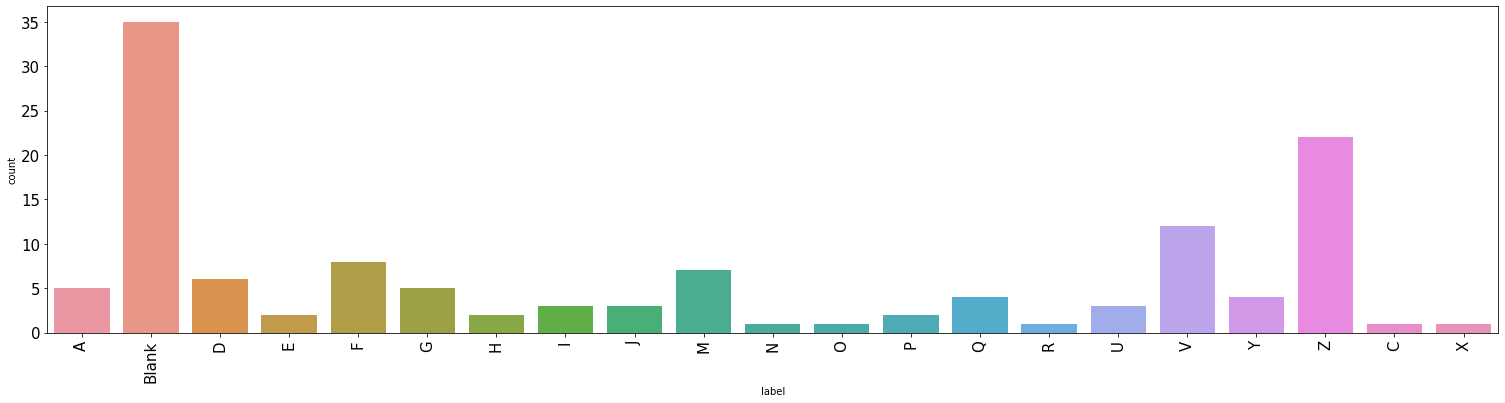

In [387]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(26, 6))
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

wrong_result_df =test_df[test_df['label_gt'] != test_df['label_pre']]

sns.countplot(data=wrong_result_df, x='label')


In [394]:
label_dict

{0: 'A',
 1: 'B',
 2: 'Blank',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z'}

In [395]:
def getClassName(classNo):
    if   classNo == 0: return 'A'
    elif classNo == 1: return 'B'
    elif classNo == 2: return 'Blank'
    elif classNo == 3: return 'C'
    elif classNo == 4: return 'D'
    elif classNo == 5: return 'E'
    elif classNo == 6: return 'F'
    elif classNo == 7: return 'G'
    elif classNo == 8: return 'H'
    elif classNo == 9: return 'I'
    elif classNo == 10: return 'J'
    elif classNo == 11: return 'K'
    elif classNo == 12: return 'L'
    elif classNo == 13: return 'M'
    elif classNo == 14: return 'N'
    elif classNo == 15: return 'O'
    elif classNo == 16: return 'P'
    elif classNo == 17: return 'Q'
    elif classNo == 18: return 'R'
    elif classNo == 19: return 'S'
    elif classNo == 20: return 'T'
    elif classNo == 21: return 'U'
    elif classNo == 22: return 'V'
    elif classNo == 23: return 'W'
    elif classNo == 24: return 'X'
    elif classNo == 25: return 'Y'
    elif classNo == 26: return 'Z'


  

In [410]:
import cv2
import numpy as np
from keras.models import load_model

cap = cv2.VideoCapture(0)
#fgbg = cv2.createBackgroundSubtractorMOG2(detectShadows=False)

while 1:
    hasFrame,ImgFrame=cap.read()
    if not hasFrame:
        print("x")
        break
    #fgmask=fgbg.apply(ImgFrame)
    #print(fgmask)
    img=cv2.fastNlMeansDenoisingColored(ImgFrame,None,10,10,7,21)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([0,48,80], dtype="uint8")

    upper = np.array([20,255,255], dtype="uint8")

    img_hand = cv2.inRange(img, lower, upper)
    
    img = cv2.resize(img,(200,200))
    contours, hierarchy = cv2.findContours(img_hand, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    max = 0
    maxcnt = None
    for cnt in contours :
        area = cv2.contourArea(cnt)
        if(max < area) :
            max = area
            maxcnt = cnt
    mask = np.zeros(img.shape).astype(img.dtype)
    cv2.fillPoly(mask, [maxcnt], (0,255,0))
    hull = cv2.convexHull(maxcnt)

    cv2.drawContours(img_hand, [maxcnt],0, (255,0,0), 3)
    cv2.drawContours(img_hand, [hull],0, (0,255,0), 3)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=img[np.newaxis,:,:, np.newaxis]
    img=img/255.0
    print(type(img))
    #img = cv2.GaussianBlur(img, (3, 3), 0) 
    
    #cv2.imshow('frame',ImgFrame)
    #cv2.imshow('bgsub',img)
    cv2.putText(ImgFrame, "CLASS: ", (20, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(ImgFrame, "PROBABILITY: ", (20, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
    
    model=load_model('my_model.h5')
    predictions = model.predict(img)
    classIndex = np.argmax(predictions, axis=1) 
    print(classIndex)
    probabilityValue = np.amax(predictions)
    print(probabilityValue)
    #contours,_=cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    #conts=sorted(contours,key=cv2.contourArea,reverse=True)[0]
    #x,y,w,h=cv2.boundingRect(conts)
    #print(x,y,w,h)
    
    if probabilityValue > 0.7:
        #caption="{} : {}".format(dictss(classIndex),probabilityValue)
        #cv2.rectangle(ImgFrame,(x,y),(x+w,y+h),color=(0,255,0),thickness=3)
        cv2.putText(ImgFrame,str(getClassName(classIndex[0])), 
                    (120, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
        cv2.putText(ImgFrame, str(round(probabilityValue*100, 2))+"%", 
                      (180, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2, cv2.LINE_AA)    
            
    cv2.imshow("Result", ImgFrame)
    
    if cv2.waitKey(1) & 0xff == 27:
        break
            
cap.release()
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


ValueError: in user code:

    File "C:\Users\hyebin\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\hyebin\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hyebin\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\hyebin\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\hyebin\AppData\Roaming\Python\Python37\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hyebin\AppData\Roaming\Python\Python37\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Exception encountered when calling layer "model_17" (type Functional).
    
    Input 0 of layer "conv2d_85" is incompatible with the layer: expected axis -1of input shape to have value 1, but received input with shape (None, 200, 200, 1, 3)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 200, 200, 1, 3), dtype=float32)
      • training=False
      • mask=None


In [66]:
import sys
import cv2
#import pytesseract
from PIL import Image

In [1]:
import cv2
import numpy as np

from keras.models import load_model

frameWidth = 640
frameHeight = 480
#brightness = 180
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
#cap.set(10, brightness)

def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = img/255
    return img

model= load_model('./my_model.h5')

while 1:
    hasFrame,ImgFrame=cap.read()
    
    if not hasFrame:
        print("x")
        break
    
    k=cv2.waitKey(0)
    if k==27:
        break
        
    #img = np.asarray(ImgFrame)
    #img = preprocessing(img)
    cv2.imshow("precessed image",ImgFrame)
    
    cv2.putText(ImgFrame, "CLASS: ", (20, 35), cv2.FONT_HERSHEY_SIMPLEX, 
                0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(ImgFrame, "PROBABILITY: ", (20, 75), cv2.FONT_HERSHEY_SIMPLEX,
                0.75, (255, 0, 0), 2, cv2.LINE_AA)
    
    img = cv2.cvtColor(ImgFrame, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(64,64))
    img=img[:,:, np.newaxis]
    img =img/255.0
    
    predictions = model.predict(img)
    classIndex = np.argmax(predictions, axis=-1) 
    probabilityValue = np.amax(predictions)
    if probabilityValue > 0.3:
    # print(getClassName(classIndex))
        cv2.putText(ImgFrame, str(classIndex)+" "+str(dictss(classIndex)), (120, 35), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(ImgFrame, str(round(probabilityValue*100, 2))+"%", (180, 75), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2, cv2.LINE_AA)
        
    cv2.imshow("Result", ImgFrame)

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

ValueError: in user code:

    File "C:\Users\hyebin\anaconda3\envs\tensorflow_gpu_py\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\hyebin\anaconda3\envs\tensorflow_gpu_py\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hyebin\anaconda3\envs\tensorflow_gpu_py\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\hyebin\anaconda3\envs\tensorflow_gpu_py\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\hyebin\anaconda3\envs\tensorflow_gpu_py\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d_12" (type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node model_4/max_pooling2d_12/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](model_4/conv2d_21/Relu)' with input shapes: [32,64,1,64].
    
    Call arguments received by layer "max_pooling2d_12" (type MaxPooling2D):
      • inputs=tf.Tensor(shape=(32, 64, 1, 64), dtype=float32)


In [2]:
def getClassName(classNo):
    if   classNo == 0: return 'A'
    elif classNo == 1: return 'B'
    elif classNo == 2: return 'C'
    elif classNo == 3: return 'D'
    elif classNo == 4: return 'E'
    elif classNo == 5: return 'F'
    elif classNo == 6: return 'G'
    elif classNo == 7: return 'H'
    elif classNo == 8: return 'I'
    elif classNo == 9: return 'J'
    elif classNo == 10: return 'K'
    elif classNo == 11: return 'L'
    elif classNo == 12: return 'M'
    elif classNo == 13: return 'N'
    elif classNo == 14: return 'O'
    elif classNo == 15: return 'P'
    elif classNo == 16: return 'Q'
    elif classNo == 17: return 'R'
    elif classNo == 18: return 'S'
    elif classNo == 19: return 'T'
    elif classNo == 20: return 'U'
    elif classNo == 21: return 'V'
    elif classNo == 22: return 'W'
    elif classNo == 23: return 'X'
    elif classNo == 24: return 'Y'
    elif classNo == 25: return 'Z'
    elif classNo == 26: return 'del'
    elif classNo == 27: return 'nothing'
    elif classNo == 28: return 'space'
  

In [3]:
from keras.models import load_model
import cv2
import numpy as np

def run():
    try:
        cap = cv2.VideoCapture(0)
    except:
        print("x")
        return
        
    while 1:
        hasFrame,ImgFrame=cap.read()
        if not hasFrame:
            print("xss")
            break
        
       
            
        gray=cv2.cvtColor(ImgFrame,cv2.COLOR_BGR2GRAY)
        gray_copy=np.asarray(gray.copy())
        img=cv2.resize(gray,(64,64))
        img=img[np.newaxis,:,:, np.newaxis]
        img=img/255.0
        
        model=load_model('my_model.h5')
        
        predictions = model.predict(img)
        classIndex = np.argmax(predictions, axis=1) 
        probabilityValue = np.amax(predictions)
        if probabilityValue > 0.3:
            grays=cv2.GaussianBlur(gray_copy,(3,3),0)
            edge=cv2.Canny(grays,75,200)
            contours,_=cv2.findContours(edge,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            conts=sorted(contours,key=cv2.contourArea,reverse=True)[0]
            x,y,w,h=cv2.boundingRect(conts)
            #caption="{} : {}".format(dictss(classIndex),probabilityValue)
            cv2.rectangle(ImgFrame,(x,y),(x+w,y+h),color=(0,255,0),thickness=3)
            cv2.putText(ImgFrame,str(getClassName(classIndex))+" "+str(round(probabilityValue*100, 2))+"%", (120, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
            
        cv2.imshow("Result", ImgFrame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    
run()

1/1 [==============================] - 0s 50ms/step


IndexError: list index out of range